In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
file_path = "15min-ETH-s0p65-20250113-KKP212_B2B_KAPUAS_MAJU_JAYA_1K.csv"

data = pd.read_csv(file_path, header = 1)

# data.to_csv('rmon.csv', index = False)

In [63]:
data

,Time Stamp,RX Octs,TX Octs,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,Status.1,RX Fragments,...,TX Queue7 Discard,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Record Status,RX Peak Rate [Mbps],TX Peak Rate [Mbps],RX Peak Detect Time,TX Peak Detect Time
0,00:15,3122239,30861,36088,215,2476,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,00:14:50,00:14:50
1,00:30,3302525,19017,38006,182,2468,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,00:29:50,00:29:50
2,00:45,1977695,32819,24050,256,2473,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,00:44:50,00:44:50
3,01:00,1381236,19017,18063,182,2467,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,00:59:50,00:59:50
4,01:15,2752732,119543,32393,531,2476,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,01:14:50,01:14:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23:00,3781835,18784,43587,181,3363,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,22:59:50,22:59:50
92,23:15,3292017,19017,38034,182,3365,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,23:14:50,23:14:50
93,23:30,3690803,18784,42589,181,3364,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,23:29:50,23:29:50
94,23:45,3277239,20618,38034,189,3365,NORMAL,0,NORMAL,0,...,0,NaN,NaN,NaN,NaN,MAINT,0,0,23:44:50,23:44:50


In [64]:
data.insert(3, "RX Mbps", [0] * len(data))
data.insert(4, "TX Mbps", [0] * len(data))

In [65]:
# data

In [66]:
# Mengubah ke string untuk melakukan pembersihan data
data['RX Octs'] = data['RX Octs'].astype(str)
data['TX Octs'] = data['TX Octs'].astype(str)

In [67]:
# data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'
# data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'

# Periksa apakah kolom 'RX Octs' atau 'TX Octs' mengandung karakter '*'
if data['RX Octs'].str.contains(r'\*').any() or data['TX Octs'].str.contains(r'\*').any():
    # Hapus karakter '*' jika ditemukan
    data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)
    data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)
    print("Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.")
else:
    print("Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.")


Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.


In [68]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M').dt.time
data['RX Mbps'] = data['RX Mbps'].astype(float)
data['TX Mbps'] = data['TX Mbps'].astype(float)
data['RX Octs'] = data['RX Octs'].astype(float)
data['TX Octs'] = data['TX Octs'].astype(float)


In [69]:
# data.tail()

In [70]:
# data.dtypes


In [71]:
data['RX Mbps'] = (data['RX Octs'] * 8)/(60*15)/1000000
data['TX Mbps'] = (data['TX Octs'] * 8)/(60*15)/1000000

In [72]:
# data

In [73]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M')

# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

In [74]:
# data =data.drop(index=95)

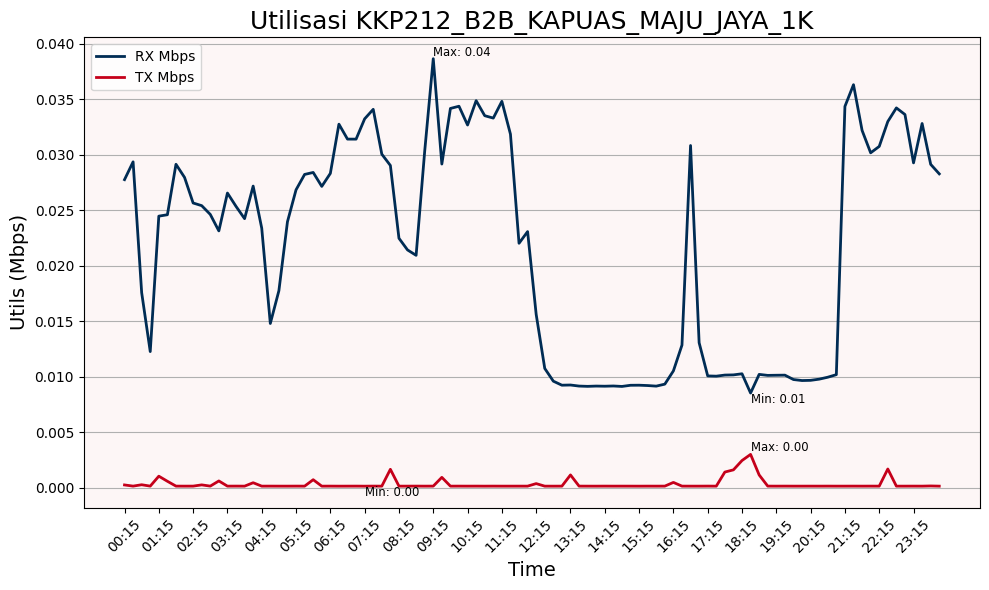

In [75]:
# Membuat grafik garis untuk RX Mbps dan TX Mbps
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor('#FDF6F6')

# Plot RX Mbps dan TX Mbps
# plt.plot(data.index, data['RX Mbps'], label='RX Mbps', color='blue', marker='o', linestyle='-', linewidth=2)
# plt.plot(data.index, data['TX Mbps'], label='TX Mbps', color='red', marker='o', linestyle='-', linewidth=2)

# Plot RX Mbps dan TX Mbps
plt.plot(data['Time Stamp'], data['RX Mbps'], label='RX Mbps', color='#002C54', linestyle='-', linewidth=2)
plt.plot(data['Time Stamp'], data['TX Mbps'], label='TX Mbps', color='#C5001A', linestyle='-', linewidth=2)

# Menambahkan judul grafik
file_base = os.path.splitext(os.path.basename(file_path))[0]
title_part = file_base.split('-')[4]
plt.title(f"Utilisasi {title_part}", fontsize= 18)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Utils (Mbps)', fontsize=14)

# Menambahkan legenda
plt.legend(loc='upper left')

#interval data
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

# Menandai sumbu x berdasarkan index data
# plt.xlim([data['Time Stamp'].min(),data['Time Stamp'].max()])

# Menemukan nilai tertinggi
max_rx = data['RX Mbps'].max()
min_rx = data['RX Mbps'].min()
max_tx = data['TX Mbps'].max()
min_tx = data['TX Mbps'].min()

# Menampilkan baris data tertinggi
highest_rx = data.loc[data['RX Mbps'] == max_rx]
lowest_rx = data.loc[data['RX Mbps'] == min_rx]
highest_tx = data.loc[data['TX Mbps'] == max_tx]
lowest_tx = data.loc[data['TX Mbps'] == min_tx]

# Menambahkan anotasi pada titik tertinggi
for idx, row in highest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Max: {row['RX Mbps']:.2f}", color='black', fontsize='small', va='bottom')

for idx, row in lowest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Min: {row['RX Mbps']:.2f}", color='black', fontsize='small', va='top')

for idx, row in highest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"Max: {row['TX Mbps']:.2f}", color='black', fontsize='small', va='bottom')

for idx, row in lowest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"Min: {row['TX Mbps']:.2f}", color='black', fontsize='small', va='top')

# Menambahkan margin +100 dari nilai maksimum data
# plt.ylim(0, max_rx * 1.2)
# plt.ylim(0, max_tx * 1.2)

# Menampilkan grafik
plt.grid(axis='y')
plt.xticks(data['Time Stamp'][::4], rotation=45)
plt.tight_layout()
plt.show()